In [25]:
import matplotlib.pyplot as plt
import numpy as np
from palettable.cartocolors.qualitative import Prism_10 as colorscheme

plt.style.use('default')
plt.rcParams.update(
    {
        "text.usetex": True,
        "font.size": 11,
        "font.family": "lmodern",
        "legend.fontsize": "x-small",
        "figure.figsize": (15, 5),
        "axes.labelsize": "x-small",
        "axes.titlesize": "x-small",
        "xtick.labelsize": "xx-small",
        "ytick.labelsize": "xx-small",
    }
)

In [155]:
from matplotlib.transforms import Bbox

def full_extent(ax, pad=0.0):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels() 
#    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])

    return bbox.expanded(1.0 + pad, 1.0 + pad)

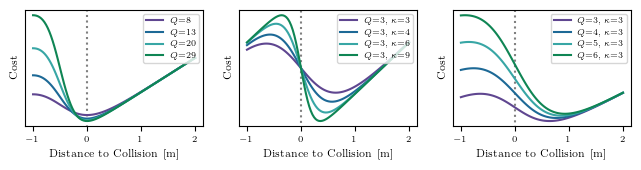

In [205]:
def my_cost_function(x, Q, r):
    x_min = np.log((np.sqrt(Q**2 - 4*Q) + Q) / 2 - 1)
    s = r / x_min
    cost = (s* Q) / (1 + np.exp((x+r)/s)) + (x+r)
    return cost

def other_cost_function(x, Q, k, r):
    cost = (Q) / (1 + np.exp(k*x)) + x
    return cost

x = np.linspace(-1, 2, 100)

fig, axs = plt.subplots(1, 3, figsize=[6.7, 1.7])
plt.tight_layout()
fig.subplots_adjust(wspace=0.2)
for ax in axs:
    ax.set_prop_cycle('color', colorscheme.mpl_colors)

axs[0].plot(x, my_cost_function(x, 8, 0.5), label='$Q$=8')
axs[0].plot(x, my_cost_function(x, 8+5, 0.5), label='$Q$=13')
axs[0].plot(x, my_cost_function(x, 8+5+7, 0.5), label='$Q$=20')
axs[0].plot(x, my_cost_function(x, 8+5+7+9, 0.5), label='$Q$=29')

axs[1].plot(x, other_cost_function(x, 3, 3, 0.5), label='$Q$=3, $\kappa$=3')
axs[1].plot(x, other_cost_function(x, 3, 4, 0.5), label='$Q$=3, $\kappa$=4')
axs[1].plot(x, other_cost_function(x, 3, 6, 0.5), label='$Q$=3, $\kappa$=6')
axs[1].plot(x, other_cost_function(x, 3, 9, 0.5), label='$Q$=3, $\kappa$=9')

axs[2].plot(x, other_cost_function(x, 3, 3, 0.5), label='$Q$=3, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 4, 3, 0.5), label='$Q$=4, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 5, 3, 0.5), label='$Q$=5, $\kappa$=3')
axs[2].plot(x, other_cost_function(x, 6, 3, 0.5), label='$Q$=6, $\kappa$=3')

for ax in axs:
    ax.autoscale_view()
    ax.set_autoscale_on(False)
    ax.vlines(0, 0, 10, linestyle=':', color='grey', zorder=-10)

    ax.set_yticks([])

    ax.set_xlabel('Distance to Collision [m]')

    ax.legend(loc=1, prop={'size': 6})

    ax.set_ylabel('Cost')

# axs[0].set_title('My Cost Function')
# axs[1].set_title('Kamel et al. Cost Function (Q=3)')
# axs[2].set_title('Kamel et al. Cost Function (k=3)')

# Show the plot
plt.show()

for i, ax in enumerate(axs):
    extent = ax.get_tightbbox(fig.canvas.renderer).transformed(fig.dpi_scale_trans.inverted())
    extent.x0 -= 0.01
    extent.x1 += 0.01
    extent.y0 -= 0.01
    extent.y1 += 0.01
    fig.savefig(f'figures/nmpc_cost_function_{i}.pdf', bbox_inches=extent)


In [16]:
cost_function(x, 3, 1)

/var/folders/92/8k5fmrg912ddw3078_56nn2c0000gn/T/ipykernel_58406/2514431587.py:2: RuntimeWarning: invalid value encountered in sqrt
  x_min = np.log((np.sqrt(Q**2 - 4*Q) + Q) / 2 - 1)


array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan])